In [1]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import h5py
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


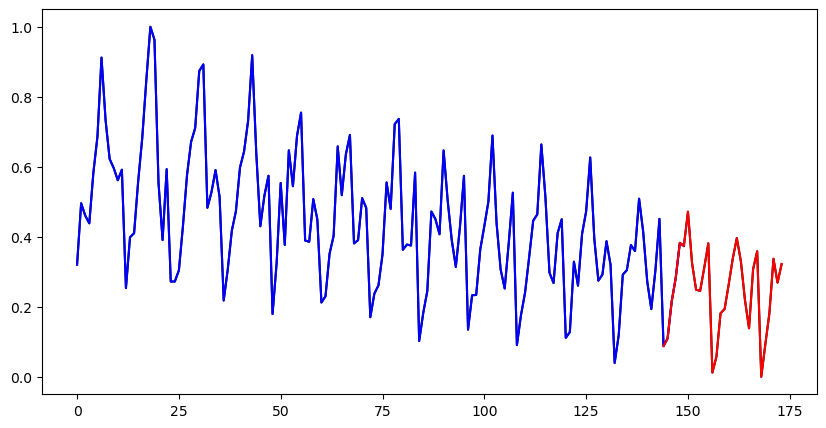

In [2]:
file = h5py.File('Data/Fort.mat', 'r')
data = file.get('Fort')
Fort = np.array(data)
F = np.ravel(Fort)
F = F.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
F = scaler.fit_transform(F)
F_tr = F[:150]
F_test = F[144:]
plt.figure(figsize = (10, 5))
plt.plot(F, 'k')
plt.plot(np.r_[:150],F_tr, 'b')
plt.plot(np.r_[144:174],F_test, 'r')
plt.show()

In [3]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
data_gen = TimeseriesGenerator(F_tr, F_tr,
 length=6, sampling_rate=1,
 batch_size=150)
batch_0 = data_gen[0]
x, y = batch_0 # вход и обучающий выход для сети
print(x.shape) # 144 точки обучения, прогноз 1 точки по 6 прошлым
xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
yy=y
print(xx.shape) # меняем местами размерности
print(yy.shape) #

(144, 6, 1)
(144, 1, 6)
(144, 1)


In [4]:
model = Sequential() # слои соединены последовательно
model.add(LSTM(units=20, input_shape=(1, 6))) # 20 нейронов
model.add(Dense(units = 1)) # выход одномерный
model.compile(optimizer = 'adam', loss = 'mean_squared_error')


C:\Users\Shinik\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model = Sequential()
model.add(LSTM(units=20, return_sequences=True, input_shape=(1, 6)))
model.add(Dropout(0.2))
model.add(LSTM(units=20, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=20))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [6]:
model.fit(xx, yy, epochs = 100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2337
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2091 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2030 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2030 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1774 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1635 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1467 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1266 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1199 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1132 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0791 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0636 
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0439 
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0397 
Epoch 15/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0365 
Epoch 16/100
5/5 ━━━

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step


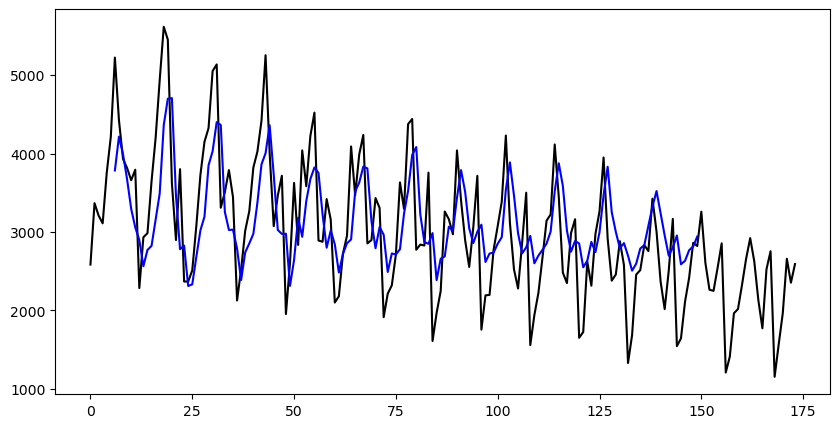

In [7]:
trainPredict = model.predict(xx)
trainPredict = scaler.inverse_transform(trainPredict)
plt.figure(figsize = (10, 5))
plt.plot(Fort, 'k')
plt.plot(np.r_[6:150],trainPredict, 'b')
plt.show()

In [8]:
data_gen = TimeseriesGenerator(F_test, F_test,
 length=6, sampling_rate=1,
 batch_size=150)
batch_0 = data_gen[0]
x, y = batch_0
xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
yy = y
print(xx.shape) # прогноз на 24 точки по 6 наблюдениям
print(yy.shape) 

(24, 1, 6)
(24, 1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


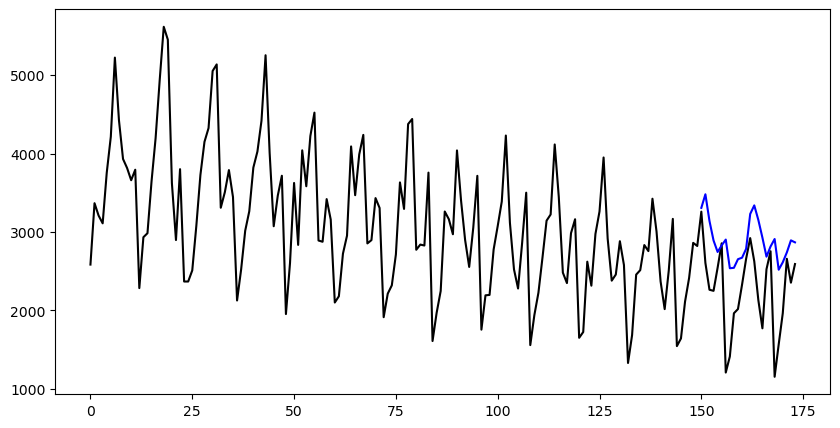

In [9]:
testPredict = model.predict(xx)
testPredict = scaler.inverse_transform(testPredict)
plt.figure(figsize = (10, 5))
plt.plot(Fort, 'k')
plt.plot(np.r_[150:174],testPredict, 'b')
plt.show()

In [10]:
F_tr = F[:174]
F_test = F[130:]

In [11]:
data_gen = TimeseriesGenerator(F_tr, F_tr,
 length=20, sampling_rate=1,
 batch_size=150)
batch_0 = data_gen[0]
x, y = batch_0 # вход и обучающий выход для сети
print(x.shape) # 144 точки обучения, прогноз 1 точки по 6 прошлым
xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
yy=y
print(xx.shape) # меняем местами размерности
print(yy.shape) #

m = 30

model = Sequential()
model.add(LSTM(units=m, return_sequences=True, input_shape=(1, 20)))
model.add(Dropout(0.15))
model.add(LSTM(units=m, return_sequences=True))
model.add(Dropout(0.15))
model.add(LSTM(units=m))
model.add(Dropout(0.15))
model.add(Dense(units = 2))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')



(150, 20, 1)
(150, 1, 20)
(150, 1)


C:\Users\Shinik\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.fit(xx, yy, epochs = 200)

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1747
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1799 
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1519 
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1216 
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1239 
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0845 
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0670 
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0371 
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0341 
Epoch 10/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0385 
Epoch 11/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0294 
Epoch 12/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0277 
Epoch 13/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0298 
Epoch 14/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0297 
Epoch 15/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0274 
Epoch 16/200
5/5 ━━━

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step


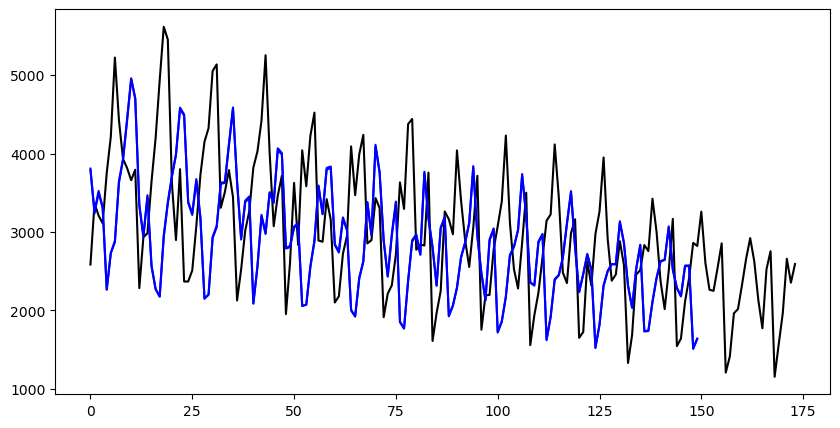

In [13]:
trainPredict = model.predict(xx)
trainPredict = scaler.inverse_transform(trainPredict)
plt.figure(figsize = (10, 5))
plt.plot(Fort, 'k')
plt.plot(np.r_[:150], trainPredict, 'b')
plt.show()

In [14]:
data_gen = TimeseriesGenerator(F_test, F_test,
 length=20, sampling_rate=1,
 batch_size=150)
batch_0 = data_gen[0]
x, y = batch_0
xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
yy = y
print(xx.shape) # прогноз на 24 точки по 6 наблюдениям
print(yy.shape) 

(24, 1, 20)
(24, 1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


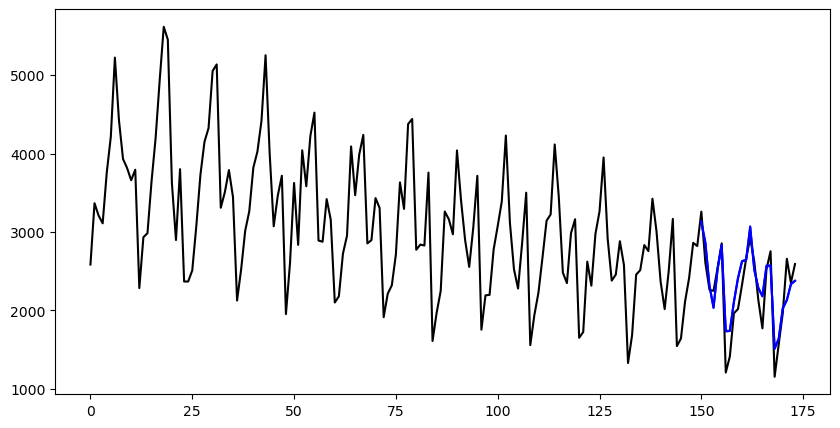

In [15]:
testPredict = model.predict(xx)
testPredict = scaler.inverse_transform(testPredict)
plt.figure(figsize = (10, 5))
plt.plot(Fort, 'k')
plt.plot(np.r_[150:174],testPredict, 'b')
plt.show()

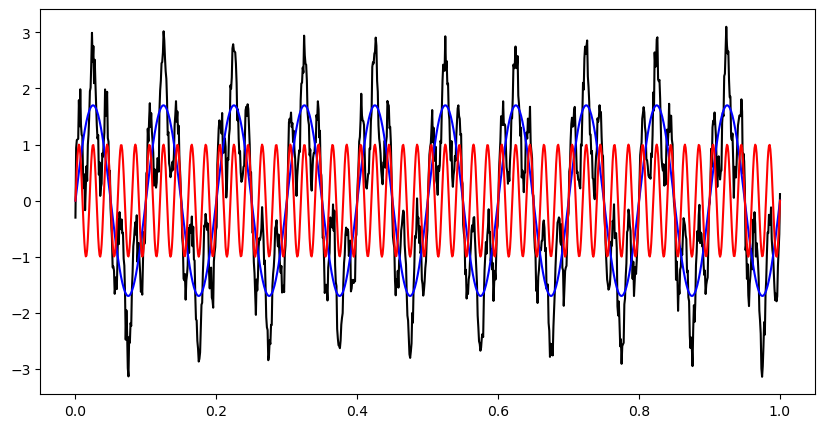

In [114]:
t = np.linspace(0, 1, 1024)
f1 = 10
f2 = 50
F=1.7*np.sin(2*np.pi*f1*t)+np.sin(2*np.pi*f2*t)+0.2*rand.randn(len(t))
plt.figure(figsize = (10, 5))
plt.plot(t, F, 'k')
plt.plot(t, 1.7*np.sin(2*np.pi*f1*t), 'b')
plt.plot(t, np.sin(2*np.pi*f2*t), 'r')
plt.show()


In [128]:
F_tr, F_test = F[:len(F)-226].reshape(-1, 1), F[len(F)-286:].reshape(-1, 1)

data_gen = TimeseriesGenerator(F_tr, F_tr,
 length=30, sampling_rate=1,
 batch_size=len(F_tr))

batch_0 = data_gen[0]
x, y = batch_0 # вход и обучающий выход для сети
print(x.shape) # 144 точки обучения, прогноз 1 точки по 6 прошлым
xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
yy=y
print(xx.shape) # меняем местами размерности
print(yy.shape) #

m = 100

model = Sequential()
model.add(LSTM(units=m, return_sequences=True, input_shape=(1, 30)))
model.add(Dropout(0.3))
model.add(LSTM(units=m, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=m))
model.add(Dropout(0.4))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

(768, 30, 1)
(768, 1, 30)
(768, 1)


In [129]:
model.fit(xx, yy, epochs = 200)

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.8573
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7220 
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1624
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1141
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1012
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0907
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0846
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0984 
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0840
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0922
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0850
Epoch 12/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0811
Epoch 13/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0866
Epoch 14/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0729
Epoch 15/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0722
Ep

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step   


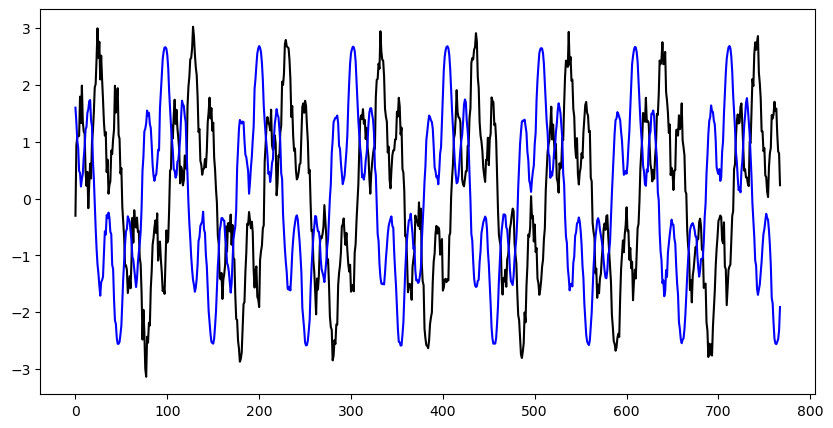

In [130]:
trainPredict = model.predict(xx)
plt.figure(figsize = (10, 5))
plt.plot(F[:768], 'k')
plt.plot(np.r_[:768], trainPredict, 'b')
plt.show()

In [131]:
data_gen = TimeseriesGenerator(F_test, F_test,
 length=30, sampling_rate=1,
 batch_size=len(F))
batch_0 = data_gen[0]
x, y = batch_0
xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
yy = y
print(xx.shape) # прогноз на 24 точки по 6 наблюдениям
print(yy.shape) 

(256, 1, 30)
(256, 1)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


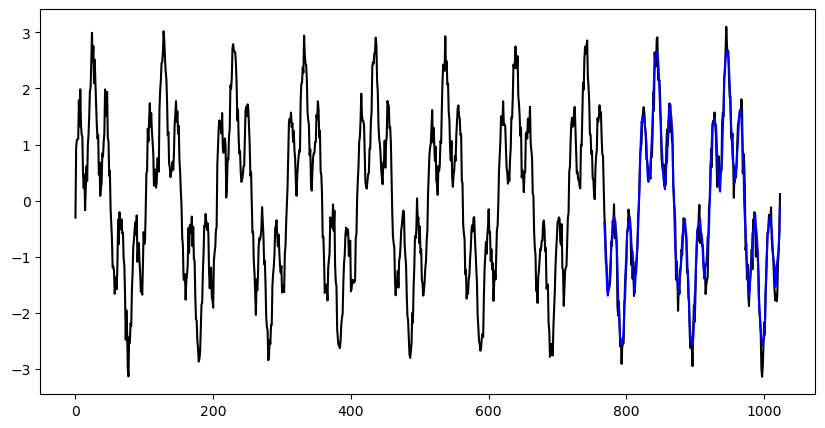

In [132]:
testPredict = model.predict(xx)
plt.figure(figsize = (10, 5))
plt.plot(F, 'k')
plt.plot(np.r_[768:1024], testPredict, 'b')
plt.show()

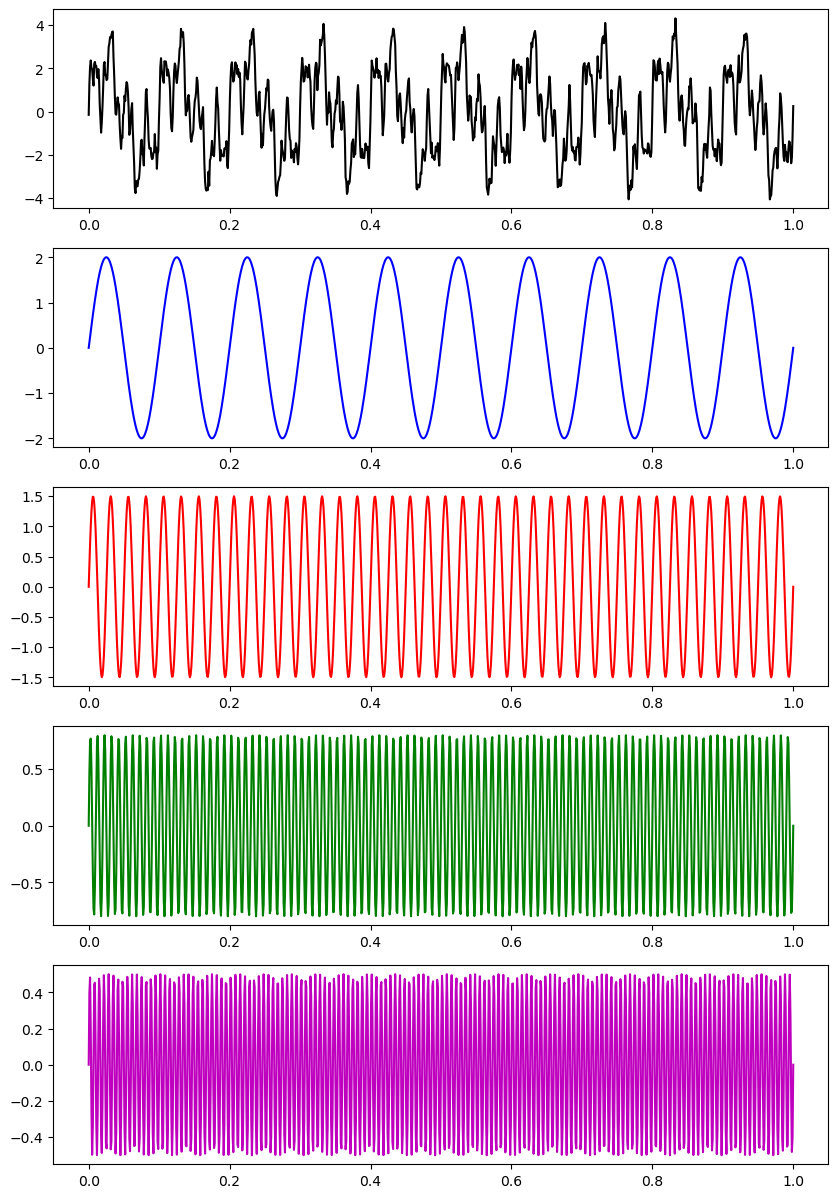

In [133]:
t = np.linspace(0,1,1024)
f1 = 10
f2 = 40
f3 = 100
f4 = 150
F=2.0*np.sin(2*np.pi*f1*t)+1.5*np.sin(2*np.pi*f2*t)+0.8*np.sin(2*np.pi*f3
*t)+0.5*np.sin(2*np.pi*f4*t)+0.2*rand.randn(len(t))
plt.figure(figsize = (10, 15))
plt.subplot(5,1,1)
plt.plot(t, F, 'k')
plt.subplot(5,1,2)
plt.plot(t, 2.0*np.sin(2*np.pi*f1*t), 'b')
plt.subplot(5,1,3)
plt.plot(t, 1.5*np.sin(2*np.pi*f2*t), 'r')
plt.subplot(5,1,4)
plt.plot(t, 0.8*np.sin(2*np.pi*f3*t), 'g')
plt.subplot(5,1,5)
plt.plot(t, 0.5*np.sin(2*np.pi*f4*t), 'm')
plt.show()

In [139]:
F=2.0*np.sin(2*np.pi*f1*t)+1.5*np.sin(2*np.pi*f2*t)+0.8*np.sin(2*np.pi*f3
*t)+0.5*np.sin(2*np.pi*f4*t)

In [140]:
F_tr, F_test = F[:len(F)-226].reshape(-1, 1), F[len(F)-286:].reshape(-1, 1)

data_gen = TimeseriesGenerator(F_tr, F_tr,
 length=30, sampling_rate=1,
 batch_size=len(F_tr))

batch_0 = data_gen[0]
x, y = batch_0 # вход и обучающий выход для сети
print(x.shape) # 144 точки обучения, прогноз 1 точки по 6 прошлым
xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
yy=y
print(xx.shape) # меняем местами размерности
print(yy.shape) #

m = 100

model = Sequential()
model.add(LSTM(units=m, return_sequences=True, input_shape=(1, 30)))
model.add(Dropout(0.3))
model.add(LSTM(units=m, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=m))
model.add(Dropout(0.4))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

(768, 30, 1)
(768, 1, 30)
(768, 1)


In [141]:
model.fit(xx, yy, epochs = 200)

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 3.6321
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0868
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3942
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1381
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1120 
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0965
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1045
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0829
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1077
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0911
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0829
Epoch 12/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0734
Epoch 13/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0668
Epoch 14/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0846
Epoch 15/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0778
Epo

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


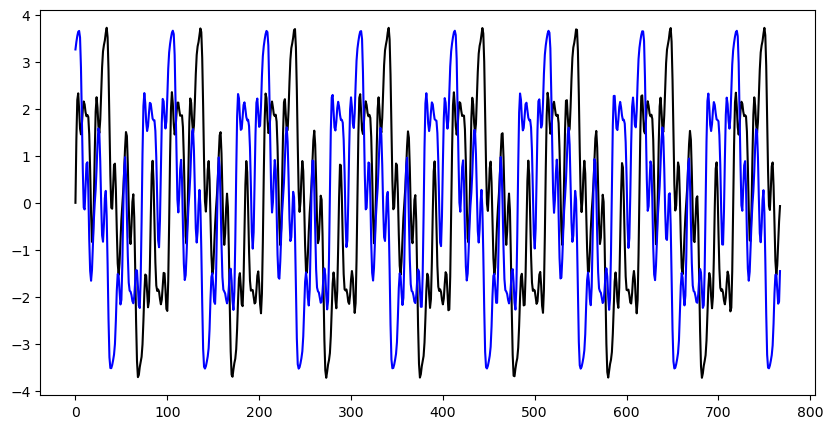

In [142]:
trainPredict = model.predict(xx)
plt.figure(figsize = (10, 5))
plt.plot(F[:768], 'k')
plt.plot(np.r_[:768], trainPredict, 'b')
plt.show()

In [143]:
data_gen = TimeseriesGenerator(F_test, F_test,
 length=30, sampling_rate=1,
 batch_size=len(F))
batch_0 = data_gen[0]
x, y = batch_0
xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
yy = y
print(xx.shape) # прогноз на 24 точки по 6 наблюдениям
print(yy.shape) 

(256, 1, 30)
(256, 1)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


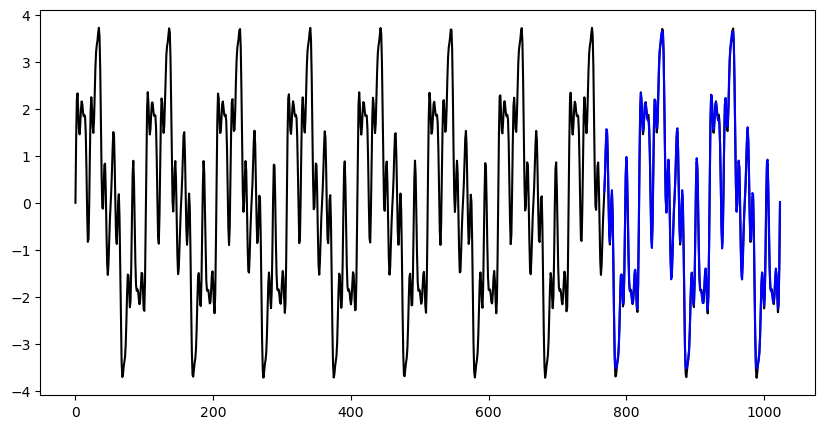

In [144]:
testPredict = model.predict(xx)
plt.figure(figsize = (10, 5))
plt.plot(F, 'k')
plt.plot(np.r_[768:1024], testPredict, 'b')
plt.show()